## 1. Introduction



In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train['FamilySize'] = train.SibSp + train.Parch
test['FamilySize'] = test.SibSp + test.Parch;
# Get Title from Name
train['Title'] = [i.split(",")[1].split(".")[0].strip() for i in train["Name"]]
train["Title"] = pd.Series(train['Title'])
print('Titles: ', train.Title.nunique())
print(train.Title.value_counts())

Titles:  17
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
the Countess      1
Don               1
Capt              1
Jonkheer          1
Lady              1
Mme               1
Name: Title, dtype: int64


In [30]:
train["Title"] = train["Title"].replace(['Lady', 'the Countess','Countess','Capt','Col','Don','Dr', 
                                         'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace(['Mlle', 'Ms'], 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

print(train.Title.value_counts())

test['Title'] = [i.split(",")[1].split(".")[0].strip() for i in test["Name"]]
test["Title"] = pd.Series(test['Title'])
test["Title"] = test["Title"].replace(['Lady', 'the Countess','Countess','Capt','Col','Don','Dr', 
                                       'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace(['Mlle', 'Ms'], 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

print(test.Title.value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: Title, dtype: int64
Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64


      Sex  Survived
0  female  0.742038
1    male  0.188908


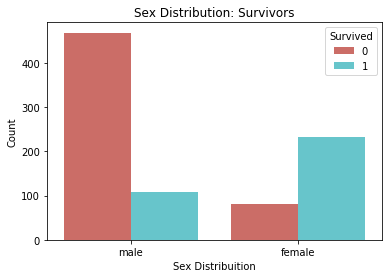

In [5]:
print(train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())
sns.countplot(x="Sex", data=train, hue="Survived", palette="hls")
plt.title('Sex Distribution: Survivors')
plt.xlabel('Sex Distribuition')
plt.ylabel('Count')
plt.show()

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


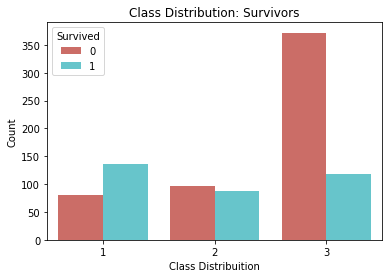

In [6]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())
sns.countplot(x="Pclass", data=train, hue="Survived", palette="hls")
plt.title('Class Distribution: Survivors')
plt.xlabel('Class Distribuition')
plt.ylabel('Count')
plt.show()

   FamilySize  Survived
0           0  0.303538
1           1  0.552795
2           2  0.578431
3           3  0.724138
4           4  0.200000
5           5  0.136364
6           6  0.333333
7           7  0.000000
8          10  0.000000


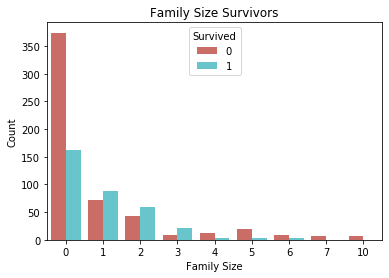

In [7]:
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())
sns.countplot(x="FamilySize", data=train, hue="Survived", palette="hls")
plt.title('Family Size Survivors')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

      Age  Survived
0    0.42       1.0
1    0.67       1.0
2    0.75       1.0
3    0.83       1.0
4    0.92       1.0
..    ...       ...
83  70.00       0.0
84  70.50       0.0
85  71.00       0.0
86  74.00       0.0
87  80.00       1.0

[88 rows x 2 columns]


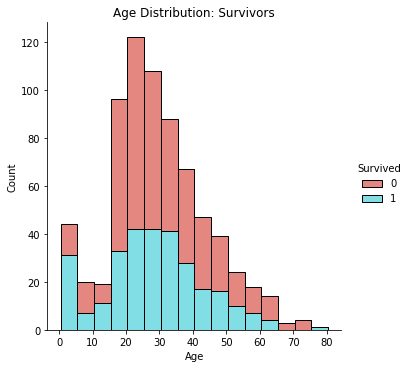

In [8]:
print (train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean())
sns.displot(data=train, x="Age", hue="Survived", kind="hist", binwidth = 5, multiple = "stack", palette="hls");
plt.title('Age Distribution: Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


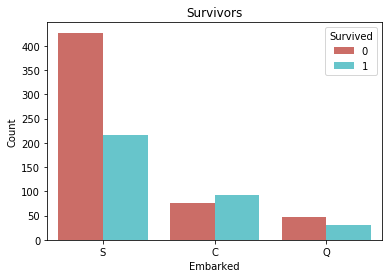

In [9]:
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())
sns.countplot(x="Embarked", data=train, hue="Survived", palette="hls")
plt.title('Survivors')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

    Title  Survived
0  Master  0.575000
1    Miss  0.697802
2      Mr  0.156673
3     Mrs  0.792000
4    Rare  0.444444


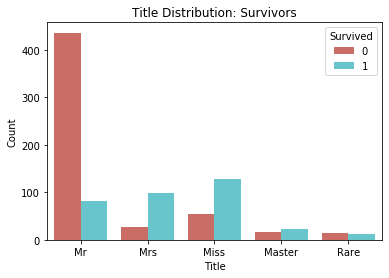

In [31]:
print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())
sns.countplot(data=train, x="Title", hue="Survived", palette="hls");
plt.title('Title Distribution: Survivors')
plt.xlabel('Title')
plt.ylabel('Count')
plt.show()

In [32]:
cols = ['Sex', 'Pclass', 'Embarked', 'Title', 'Survived', 'Age', 'FamilySize']
df = train[cols].dropna()
for col in cols[:-3]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [34]:
col_length = len(df.columns)

X = df.iloc[:, 1:col_length]
y = df.iloc[:, 0:1]

In [37]:
cols = ['Sex', 'Pclass', 'Embarked', 'Title', 'Age', 'FamilySize']
dft = test[cols].fillna(test.Age.mean())
for col in cols[:-2]:
    dft = pd.get_dummies(dft, columns=[col], prefix = [col])
    
col_length = len(dft.columns)
X_test = dft.iloc[:, 0:col_length]

In [38]:
scaler = StandardScaler()
scaler.fit_transform(X, y)
scaler.transform(X_test);

In [39]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
classifiers = []
classifiers.append(LogisticRegression(random_state = 0))
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC(random_state=0))
classifiers.append(DecisionTreeClassifier(random_state=0))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=0),random_state=0,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=0))
classifiers.append(ExtraTreesClassifier(random_state=0))
classifiers.append(GradientBoostingClassifier(random_state=0))
classifiers.append(MLPClassifier(random_state=0))
classifiers.append(LinearDiscriminantAnalysis())

cv_predictions = []
cv_results = []
#models = 
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X, y = y, scoring = "accuracy", cv = 10, n_jobs=4))
    model = classifier.fit(X, y)
    cv_predictions.append(round(classifier.score(X, y), 2))
    

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())


In [40]:
cv_res = pd.DataFrame({"Predictions":cv_predictions,"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                       "Algorithm":['LogisticRegression',"KNeighboors","SVC","DecisionTree","AdaBoost",
                                    "RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron",
                                    "LinearDiscriminantAnalysis"]})
cv_res

,Predictions,CrossValMeans,CrossValerrors,Algorithm
0,0.84,0.824491,0.036549,LogisticRegression
1,0.87,0.797848,0.043634,KNeighboors
2,0.63,0.626428,0.027902,SVC
3,0.95,0.772633,0.046816,DecisionTree
4,0.95,0.775528,0.059758,AdaBoost
5,0.95,0.783881,0.053453,RandomForest
6,0.95,0.771205,0.043005,ExtraTrees
7,0.88,0.821714,0.052359,GradientBoosting
8,0.84,0.820403,0.053261,MultipleLayerPerceptron
9,0.83,0.828658,0.039694,LinearDiscriminantAnalysis


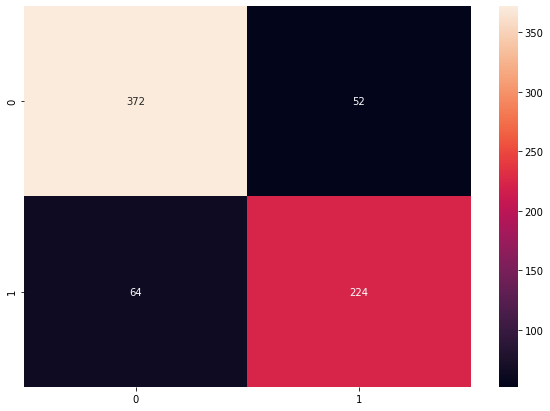

In [41]:
model = LogisticRegression()
lr_model = model.fit(X, y)
lrpredictions = lr_model.predict(X) 

cm = confusion_matrix(y, lrpredictions)
lr_labels = lr_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt="d");

y_preds = lr_model.predict(X_test)

In [43]:
submission = pd.DataFrame({"PassengerId": test['PassengerId'], "Survived":  y_preds})

submission.to_csv('submission.csv', index=False)